In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
import matplotlib.dates as mdates
import squarify

In [69]:
# Read the city's csv file
london_df = pd.read_csv("CleanDatasets/london_AQI.csv")
london_df = london_df.sort_values("date")

# london_df.dtypes
london_df["date"] = pd.to_datetime(london_df["date"])
london_df

,date,pm25,pm10,o3,no2,so2,co,AQI
0,2019-01-02,49,22,23,26,1,8,49
1,2019-01-03,59,26,24,31,1,8,59
2,2019-01-04,55,39,16,31,1,10,55
3,2019-01-05,92,31,19,29,2,10,92
4,2019-01-06,81,29,14,31,2,10,81
...,...,...,...,...,...,...,...,...
525,2020-07-09,46,13,18,12,4,5,46
526,2020-07-19,44,9,23,11,1,1,44
527,2020-07-23,50,19,39,26,1,1,50
528,2020-07-24,47,16,22,20,2,1,47


In [70]:
# Create a data frame for the lockdown period of the city
london_lockdown_df=london_df[(london_df['date']>='2020-03-23') & (london_df['date']<='2020-05-10')]
london_lockdown_df

,date,pm25,pm10,o3,no2,so2,co,AQI
425,2020-03-23,53,26,21,29,4,7,53
426,2020-03-24,58,25,32,28,3,5,58
427,2020-03-25,60,36,28,30,4,7,60
428,2020-03-26,80,47,34,21,5,6,80
429,2020-03-27,99,40,40,16,9,4,99
430,2020-03-28,90,30,37,9,4,4,90
431,2020-03-29,56,21,34,6,3,6,56
432,2020-03-30,29,17,32,12,3,4,32
433,2020-03-31,26,18,33,15,5,5,33
434,2020-04-01,38,22,31,24,6,5,38


In [71]:
# Set date as index
london_lockdown_df = london_lockdown_df.set_index("date")
london_lockdown_df

,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-03-23,53,26,21,29,4,7,53
2020-03-24,58,25,32,28,3,5,58
2020-03-25,60,36,28,30,4,7,60
2020-03-26,80,47,34,21,5,6,80
2020-03-27,99,40,40,16,9,4,99
2020-03-28,90,30,37,9,4,4,90
2020-03-29,56,21,34,6,3,6,56
2020-03-30,29,17,32,12,3,4,32
2020-03-31,26,18,33,15,5,5,33


In [72]:
london_df = london_df.set_index("date")
london_df

,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-01-02,49,22,23,26,1,8,49
2019-01-03,59,26,24,31,1,8,59
2019-01-04,55,39,16,31,1,10,55
2019-01-05,92,31,19,29,2,10,92
2019-01-06,81,29,14,31,2,10,81
...,...,...,...,...,...,...,...
2020-07-09,46,13,18,12,4,5,46
2020-07-19,44,9,23,11,1,1,44
2020-07-23,50,19,39,26,1,1,50


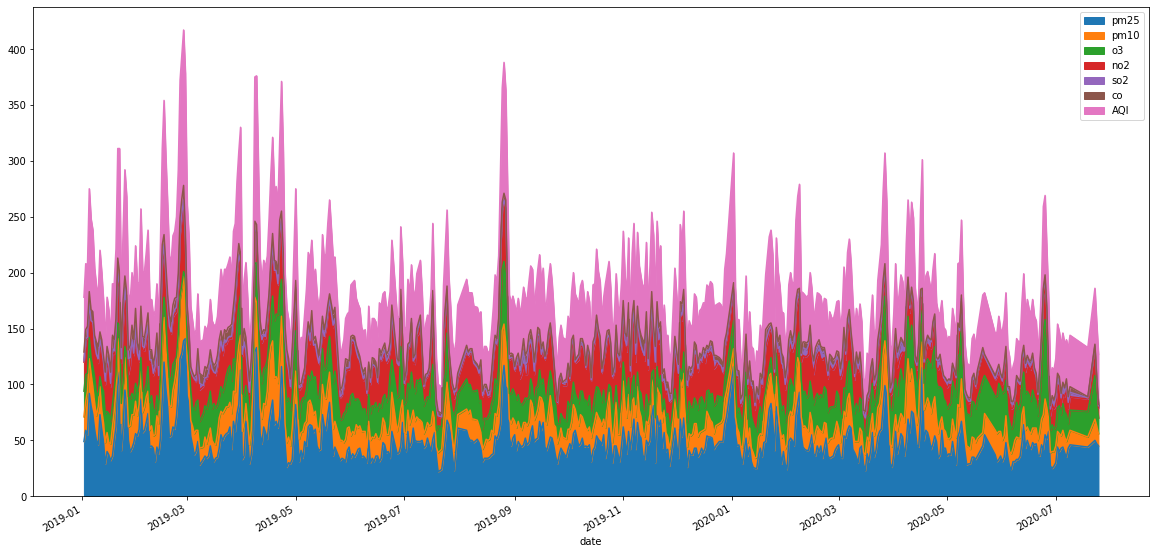

In [73]:
# Create an area chart for the pollutant levels
ax = london_df.plot.area(figsize=(20,10))

In [74]:
# Compute quartiles and upper and lower bounds for pm25
london_quartiles = london_df["pm25"].quantile([.25,.5,.75])
# Compute the lower quartile
london_lowerq = london_quartiles[0.25]

# Compute the upper quartile
london_upperq = london_quartiles[0.75]
london_iqr = london_upperq-london_lowerq
print(f"The lower quartile of london  is: {london_lowerq}")
print(f"The upper quartile of london is: {london_upperq}")
print(f"The interquartile range of london is: {london_iqr}")
lower_bound = london_lowerq - (1.5*london_iqr)
upper_bound = london_upperq + (1.5*london_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Compute the outliers
outlier_london = london_df.loc[(london_df["pm25"] < lower_bound) | (london_df["pm25"] > upper_bound)]
outlier_london

The lower quartile of london  is: 37.0
The upper quartile of london is: 57.0
The interquartile range of london is: 20.0
Values below 7.0 could be outliers.
Values above 87.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-01-05,92,31,19,29,2,10,92
2019-01-21,98,43,14,40,4,14,98
2019-01-22,111,18,24,34,3,10,111
2019-01-25,95,29,10,41,12,10,95
2019-02-16,120,40,18,45,2,9,120
2019-02-17,97,36,27,36,2,9,97
2019-02-24,93,47,5,41,2,11,93
2019-02-25,123,53,3,55,2,13,123
2019-02-26,128,58,3,61,3,13,128


In [75]:
# Compute quartiles and upper and lower bounds for pm10
london_quartiles = london_df["pm10"].quantile([.25,.5,.75])
# Compute the lower quartile
london_lowerq = london_quartiles[0.25]

# Compute the upper quartile
london_upperq = london_quartiles[0.75]
london_iqr = london_upperq-london_lowerq
print(f"The lower quartile of london  is: {london_lowerq}")
print(f"The upper quartile of london is: {london_upperq}")
print(f"The interquartile range of london is: {london_iqr}")
lower_bound = london_lowerq - (1.5*london_iqr)
upper_bound = london_upperq + (1.5*london_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Compute the outliers
outlier_london = london_df.loc[(london_df["pm10"] < lower_bound) | (london_df["pm10"] > upper_bound)]
outlier_london

The lower quartile of london  is: 16.0
The upper quartile of london is: 26.0
The interquartile range of london is: 10.0
Values below 1.0 could be outliers.
Values above 41.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-01-21,98,43,14,40,4,14,98
2019-02-14,52,46,10,53,3,11,53
2019-02-15,86,50,17,55,4,13,86
2019-02-22,60,43,18,42,4,10,60
2019-02-23,72,43,10,40,4,9,72
2019-02-24,93,47,5,41,2,11,93
2019-02-25,123,53,3,55,2,13,123
2019-02-26,128,58,3,61,3,13,128
2019-02-27,139,58,4,59,5,13,139


In [76]:
# Compute quartiles and upper and lower bounds for o3
london_quartiles = london_df["o3"].quantile([.25,.5,.75])
# Compute the lower quartile
london_lowerq = london_quartiles[0.25]

# Compute the upper quartile
london_upperq = london_quartiles[0.75]
london_iqr = london_upperq-london_lowerq
print(f"The lower quartile of london  is: {london_lowerq}")
print(f"The upper quartile of london is: {london_upperq}")
print(f"The interquartile range of london is: {london_iqr}")
lower_bound = london_lowerq - (1.5*london_iqr)
upper_bound = london_upperq + (1.5*london_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Compute the outliers
outlier_london = london_df.loc[(london_df["o3"] < lower_bound) | (london_df["o3"] > upper_bound)]
outlier_london

The lower quartile of london  is: 20.0
The upper quartile of london is: 31.0
The interquartile range of london is: 11.0
Values below 3.5 could be outliers.
Values above 47.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-01-24,61,37,3,51,9,15,61
2019-02-25,123,53,3,55,2,13,123
2019-02-26,128,58,3,61,3,13,128
2019-04-19,64,42,51,44,1,9,64
2019-04-20,67,40,56,38,1,8,67
2019-04-21,61,40,61,27,1,9,61
2019-04-22,72,56,56,46,8,9,72
2019-06-29,45,33,56,44,2,5,56
2019-08-24,65,41,58,52,1,6,65


In [77]:
# Compute quartiles and upper and lower bounds for NO2
london_quartiles = london_df["no2"].quantile([.25,.5,.75])
# Compute the lower quartile
london_lowerq = london_quartiles[0.25]

# Compute the upper quartile
london_upperq = london_quartiles[0.75]
london_iqr = london_upperq-london_lowerq
print(f"The lower quartile of london  is: {london_lowerq}")
print(f"The upper quartile of london is: {london_upperq}")
print(f"The interquartile range of london is: {london_iqr}")
lower_bound = london_lowerq - (1.5*london_iqr)
upper_bound = london_upperq + (1.5*london_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Compute the outliers
outlier_london = london_df.loc[(london_df["no2"] < lower_bound) | (london_df["no2"] > upper_bound)]
outlier_london

The lower quartile of london  is: 22.0
The upper quartile of london is: 37.0
The interquartile range of london is: 15.0
Values below -0.5 could be outliers.
Values above 59.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-02-26,128,58,3,61,3,13,128
2019-07-17,51,25,42,60,2,4,60
2019-08-27,98,39,58,62,1,7,98
2019-11-14,50,17,24,62,4,8,62


In [78]:
# Compute quartiles and upper and lower bounds for SO2
london_quartiles = london_df["so2"].quantile([.25,.5,.75])
# Compute the lower quartile
london_lowerq = london_quartiles[0.25]

# Compute the upper quartile
london_upperq = london_quartiles[0.75]
london_iqr = london_upperq-london_lowerq
print(f"The lower quartile of london  is: {london_lowerq}")
print(f"The upper quartile of london is: {london_upperq}")
print(f"The interquartile range of london is: {london_iqr}")
lower_bound = london_lowerq - (1.5*london_iqr)
upper_bound = london_upperq + (1.5*london_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Compute the outliers
outlier_london = london_df.loc[(london_df["so2"] < lower_bound) | (london_df["so2"] > upper_bound)]
outlier_london

The lower quartile of london  is: 1.0
The upper quartile of london is: 4.0
The interquartile range of london is: 3.0
Values below -3.5 could be outliers.
Values above 8.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-01-24,61,37,3,51,9,15,61
2019-01-25,95,29,10,41,12,10,95
2019-01-26,85,15,27,34,14,8,85
2019-01-27,50,12,27,20,14,8,50
2019-04-23,116,45,33,44,9,8,116
2019-09-05,44,15,23,27,11,8,44
2019-09-06,46,20,18,34,12,11,46
2019-09-07,52,14,22,21,9,8,52
2019-09-08,46,17,24,22,11,10,46


In [79]:
# Compute quartiles and upper and lower bounds for CO
london_quartiles = london_df["co"].quantile([.25,.5,.75])
# Compute the lower quartile
london_lowerq = london_quartiles[0.25]

# Compute the upper quartile
london_upperq = london_quartiles[0.75]
london_iqr = london_upperq-london_lowerq
print(f"The lower quartile of london  is: {london_lowerq}")
print(f"The upper quartile of london is: {london_upperq}")
print(f"The interquartile range of london is: {london_iqr}")
lower_bound = london_lowerq - (1.5*london_iqr)
upper_bound = london_upperq + (1.5*london_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Compute the outliers
outlier_london = london_df.loc[(london_df["co"] < lower_bound) | (london_df["co"] > upper_bound)]
outlier_london

The lower quartile of london  is: 3.0
The upper quartile of london is: 8.0
The interquartile range of london is: 5.0
Values below -4.5 could be outliers.
Values above 15.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


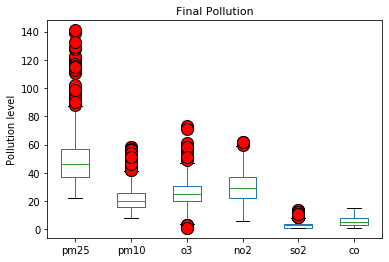

In [80]:
# plot. Set color of marker face and marker edge

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='k')
box_plot = london_df.boxplot(grid=False, column=['pm25','pm10', 'o3', 'no2', 'so2', 'co'], flierprops=flierprops)

# Set the title and y axis label
box_plot.set_title('Final Pollution', fontsize=11)
box_plot.set_ylabel("Pollution level")
plt.show()

In [81]:
# Compute quartiles and upper and lower bounds for pm25 during the lockdown period
london_lockdown_quartiles =london_lockdown_df["pm25"].quantile([.25,.5,.75])
# Compute the lower quartile
london_lockdown_lowerq = london_lockdown_quartiles[0.25]

# Compute the upper quartile
london_lockdown_upperq = london_lockdown_quartiles[0.75]
london_lockdown_iqr = london_lockdown_upperq-london_lockdown_lowerq
print(f"The lower quartile of london in lockdown is: {london_lockdown_lowerq}")
print(f"The upper quartile of london in lockdown is: {london_lockdown_upperq}")
print(f"The interquartile range of london in lockdown is: {london_lockdown_iqr}")
lower_bound = london_lockdown_lowerq - (1.5*london_lockdown_iqr)
upper_bound =london_lockdown_upperq + (1.5*london_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Compute the outliers
outlier_london_lockdown = london_lockdown_df.loc[(london_lockdown_df["pm25"] < lower_bound) | (london_lockdown_df["pm25"] > upper_bound)]
outlier_london_lockdown

The lower quartile of london in lockdown is: 42.75
The upper quartile of london in lockdown is: 59.0
The interquartile range of london in lockdown is: 16.25
Values below 18.375 could be outliers.
Values above 83.375 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-03-27,99,40,40,16,9,4,99
2020-03-28,90,30,37,9,4,4,90
2020-04-17,115,23,28,12,5,3,115


In [82]:
# Compute quartiles and upper and lower bounds for pm10 during the lockdown period
london_lockdown_quartiles =london_lockdown_df["pm10"].quantile([.25,.5,.75])
# Compute the lower quartile
london_lockdown_lowerq = london_lockdown_quartiles[0.25]

# Compute the upper quartile
london_lockdown_upperq = london_lockdown_quartiles[0.75]
london_lockdown_iqr = london_lockdown_upperq-london_lockdown_lowerq
print(f"The lower quartile of london in lockdown is: {london_lockdown_lowerq}")
print(f"The upper quartile of london in lockdown is: {london_lockdown_upperq}")
print(f"The interquartile range of london in lockdown is: {london_lockdown_iqr}")
lower_bound = london_lockdown_lowerq - (1.5*london_lockdown_iqr)
upper_bound =london_lockdown_upperq + (1.5*london_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_london_lockdown = london_lockdown_df.loc[(london_lockdown_df["pm10"] < lower_bound) | (london_lockdown_df["pm10"] > upper_bound)]
outlier_london_lockdown

The lower quartile of london in lockdown is: 18.75
The upper quartile of london in lockdown is: 32.0
The interquartile range of london in lockdown is: 13.25
Values below -1.125 could be outliers.
Values above 51.875 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-04-08,49,52,38,28,4,3,52
2020-04-09,69,54,38,27,5,3,69


In [83]:
# Compute quartiles and upper and lower bounds for o3 during the lockdown period
london_lockdown_quartiles =london_lockdown_df["o3"].quantile([.25,.5,.75])
# Compute the lower quartile
london_lockdown_lowerq = london_lockdown_quartiles[0.25]

# Compute the upper quartile
london_lockdown_upperq = london_lockdown_quartiles[0.75]
london_lockdown_iqr = london_lockdown_upperq-london_lockdown_lowerq
print(f"The lower quartile of london in lockdown is: {london_lockdown_lowerq}")
print(f"The upper quartile of london in lockdown is: {london_lockdown_upperq}")
print(f"The interquartile range of london in lockdown is: {london_lockdown_iqr}")
lower_bound = london_lockdown_lowerq - (1.5*london_lockdown_iqr)
upper_bound =london_lockdown_upperq + (1.5*london_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_london_lockdown = london_lockdown_df.loc[(london_lockdown_df["o3"] < lower_bound) | (london_lockdown_df["o3"] > upper_bound)]
outlier_london_lockdown

The lower quartile of london in lockdown is: 31.0
The upper quartile of london in lockdown is: 38.0
The interquartile range of london in lockdown is: 7.0
Values below 20.5 could be outliers.
Values above 48.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-05-09,67,38,49,20,3,3,67


In [84]:
# Compute quartiles and upper and lower bounds for no2 during the lockdown period
london_lockdown_quartiles =london_lockdown_df["no2"].quantile([.25,.5,.75])
# Compute the lower quartile
london_lockdown_lowerq = london_lockdown_quartiles[0.25]

# Compute the upper quartile
london_lockdown_upperq = london_lockdown_quartiles[0.75]
london_lockdown_iqr = london_lockdown_upperq-london_lockdown_lowerq
print(f"The lower quartile of london in lockdown is: {london_lockdown_lowerq}")
print(f"The upper quartile of london in lockdown is: {london_lockdown_upperq}")
print(f"The interquartile range of london in lockdown is: {london_lockdown_iqr}")
lower_bound = london_lockdown_lowerq - (1.5*london_lockdown_iqr)
upper_bound =london_lockdown_upperq + (1.5*london_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_london_lockdown = london_lockdown_df.loc[(london_lockdown_df["no2"] < lower_bound) | (london_lockdown_df["no2"] > upper_bound)]
outlier_london_lockdown

The lower quartile of london in lockdown is: 13.0
The upper quartile of london in lockdown is: 24.25
The interquartile range of london in lockdown is: 11.25
Values below -3.875 could be outliers.
Values above 41.125 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [85]:
# Compute quartiles and upper and lower bounds for so2 during the lockdown period
london_lockdown_quartiles =london_lockdown_df["so2"].quantile([.25,.5,.75])
# Compute the lower quartile
london_lockdown_lowerq = london_lockdown_quartiles[0.25]

# Compute the upper quartile
london_lockdown_upperq = london_lockdown_quartiles[0.75]
london_lockdown_iqr = london_lockdown_upperq-london_lockdown_lowerq
print(f"The lower quartile of london in lockdown is: {london_lockdown_lowerq}")
print(f"The upper quartile of london in lockdown is: {london_lockdown_upperq}")
print(f"The interquartile range of london in lockdown is: {london_lockdown_iqr}")
lower_bound = london_lockdown_lowerq - (1.5*london_lockdown_iqr)
upper_bound =london_lockdown_upperq + (1.5*london_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_london_lockdown = london_lockdown_df.loc[(london_lockdown_df["so2"] < lower_bound) | (london_lockdown_df["so2"] > upper_bound)]
outlier_london_lockdown

The lower quartile of london in lockdown is: 3.0
The upper quartile of london in lockdown is: 6.25
The interquartile range of london in lockdown is: 3.25
Values below -1.875 could be outliers.
Values above 11.125 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [86]:
# Compute quartiles and upper and lower bounds for co during the lockdown period
london_lockdown_quartiles =london_lockdown_df["co"].quantile([.25,.5,.75])
# Compute the lower quartile
london_lockdown_lowerq = london_lockdown_quartiles[0.25]

# Compute the upper quartile
london_lockdown_upperq = london_lockdown_quartiles[0.75]
london_lockdown_iqr = london_lockdown_upperq-london_lockdown_lowerq
print(f"The lower quartile of london in lockdown is: {london_lockdown_lowerq}")
print(f"The upper quartile of london in lockdown is: {london_lockdown_upperq}")
print(f"The interquartile range of london in lockdown is: {london_lockdown_iqr}")
lower_bound = london_lockdown_lowerq - (1.5*london_lockdown_iqr)
upper_bound =london_lockdown_upperq + (1.5*london_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_london_lockdown = london_lockdown_df.loc[(london_lockdown_df["co"] < lower_bound) | (london_lockdown_df["co"] > upper_bound)]
outlier_london_lockdown

The lower quartile of london in lockdown is: 2.0
The upper quartile of london in lockdown is: 4.0
The interquartile range of london in lockdown is: 2.0
Values below -1.0 could be outliers.
Values above 7.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


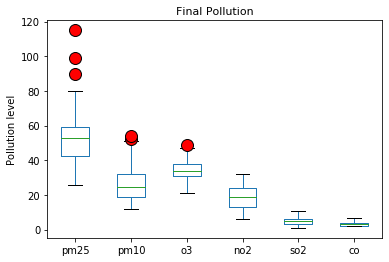

In [87]:
# Create a box plot with outliers
# plot. Set color of marker face and marker edge

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='k')
box_plot = london_lockdown_df.boxplot(grid=False, column=['pm25','pm10', 'o3', 'no2', 'so2', 'co'], flierprops=flierprops)

# Set the title and y axis label
box_plot.set_title('Final Pollution', fontsize=11)
box_plot.set_ylabel("Pollution level")
plt.show()

In [88]:
# Reset index
london_lockdown_df = london_lockdown_df.reset_index("date")
london_lockdown_df

,date,pm25,pm10,o3,no2,so2,co,AQI
0,2020-03-23,53,26,21,29,4,7,53
1,2020-03-24,58,25,32,28,3,5,58
2,2020-03-25,60,36,28,30,4,7,60
3,2020-03-26,80,47,34,21,5,6,80
4,2020-03-27,99,40,40,16,9,4,99
5,2020-03-28,90,30,37,9,4,4,90
6,2020-03-29,56,21,34,6,3,6,56
7,2020-03-30,29,17,32,12,3,4,32
8,2020-03-31,26,18,33,15,5,5,33
9,2020-04-01,38,22,31,24,6,5,38


In [89]:
# Extract the month-day from the date and create a new column
london_lockdown_df["new_date"] = london_lockdown_df["date"].dt.strftime("%m-%d")
london_lockdown_df

,date,pm25,pm10,o3,no2,so2,co,AQI,new_date
0,2020-03-23,53,26,21,29,4,7,53,03-23
1,2020-03-24,58,25,32,28,3,5,58,03-24
2,2020-03-25,60,36,28,30,4,7,60,03-25
3,2020-03-26,80,47,34,21,5,6,80,03-26
4,2020-03-27,99,40,40,16,9,4,99,03-27
5,2020-03-28,90,30,37,9,4,4,90,03-28
6,2020-03-29,56,21,34,6,3,6,56,03-29
7,2020-03-30,29,17,32,12,3,4,32,03-30
8,2020-03-31,26,18,33,15,5,5,33,03-31
9,2020-04-01,38,22,31,24,6,5,38,04-01


In [90]:
# Reset the index
london_df = london_df.reset_index("date")
london_df

,date,pm25,pm10,o3,no2,so2,co,AQI
0,2019-01-02,49,22,23,26,1,8,49
1,2019-01-03,59,26,24,31,1,8,59
2,2019-01-04,55,39,16,31,1,10,55
3,2019-01-05,92,31,19,29,2,10,92
4,2019-01-06,81,29,14,31,2,10,81
...,...,...,...,...,...,...,...,...
525,2020-07-09,46,13,18,12,4,5,46
526,2020-07-19,44,9,23,11,1,1,44
527,2020-07-23,50,19,39,26,1,1,50
528,2020-07-24,47,16,22,20,2,1,47


In [91]:
# Create a data frame for the 2019 data, same months as the lockdown period in 2020
london_2019_df=london_df[(london_df['date']>='2019-03-23') & (london_df['date']<='2019-05-10')]

london_2019_df["new_date"] = london_2019_df["date"].dt.strftime("%m-%d")
london_2019_df

C:\Users\spuna\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,pm25,pm10,o3,no2,so2,co,AQI,new_date
79,2019-03-23,56,24,28,28,2,9,56,03-23
80,2019-03-24,57,23,34,26,2,9,57,03-24
81,2019-03-25,62,22,33,24,2,9,62,03-25
82,2019-03-26,42,32,29,38,2,11,42,03-26
83,2019-03-27,67,27,29,35,2,10,67,03-27
84,2019-03-28,58,35,28,52,3,10,58,03-28
85,2019-03-29,74,45,34,46,2,7,74,03-29
86,2019-03-30,82,53,36,42,3,10,82,03-30
87,2019-03-31,113,31,36,25,4,8,113,03-31
88,2019-04-01,33,25,34,33,2,8,34,04-01


In [92]:
# Create a new column with the extracted month and day values
new_london_df = london_2019_df.merge(london_lockdown_df, on= "new_date")
new_london_df.head()

,date_x,pm25_x,pm10_x,o3_x,no2_x,so2_x,co_x,AQI_x,new_date,date_y,pm25_y,pm10_y,o3_y,no2_y,so2_y,co_y,AQI_y
0,2019-03-23,56,24,28,28,2,9,56,03-23,2020-03-23,53,26,21,29,4,7,53
1,2019-03-24,57,23,34,26,2,9,57,03-24,2020-03-24,58,25,32,28,3,5,58
2,2019-03-25,62,22,33,24,2,9,62,03-25,2020-03-25,60,36,28,30,4,7,60
3,2019-03-26,42,32,29,38,2,11,42,03-26,2020-03-26,80,47,34,21,5,6,80
4,2019-03-27,67,27,29,35,2,10,67,03-27,2020-03-27,99,40,40,16,9,4,99


In [93]:
# Rename the columns for intuitive naming
new_london_df = new_london_df.rename(columns={'date_x':'Date 2019', 'pm25_x':'2019 pm25', 'pm10_x':'2019 pm10', 'o3_x':'2019 o3', 'no2_x':'2019 no2', 'so2_x':'2019 so2', 'co_x':'2019 co', 'AQI_x':'2019 AQI', 'date_y':'Date 2020', 'pm25_y':'2020 pm25', 'pm10_y':'2020 pm10', 'o3_y':'2020 o3', 'no2_y':'2020 no2', 'so2_y':'2020 so2', 'co_y':'2020 co', 'AQI_y':'2020 AQI'})
new_london_df

,Date 2019,2019 pm25,2019 pm10,2019 o3,2019 no2,2019 so2,2019 co,2019 AQI,new_date,Date 2020,2020 pm25,2020 pm10,2020 o3,2020 no2,2020 so2,2020 co,2020 AQI
0,2019-03-23,56,24,28,28,2,9,56,03-23,2020-03-23,53,26,21,29,4,7,53
1,2019-03-24,57,23,34,26,2,9,57,03-24,2020-03-24,58,25,32,28,3,5,58
2,2019-03-25,62,22,33,24,2,9,62,03-25,2020-03-25,60,36,28,30,4,7,60
3,2019-03-26,42,32,29,38,2,11,42,03-26,2020-03-26,80,47,34,21,5,6,80
4,2019-03-27,67,27,29,35,2,10,67,03-27,2020-03-27,99,40,40,16,9,4,99
5,2019-03-28,58,35,28,52,3,10,58,03-28,2020-03-28,90,30,37,9,4,4,90
6,2019-03-29,74,45,34,46,2,7,74,03-29,2020-03-29,56,21,34,6,3,6,56
7,2019-03-30,82,53,36,42,3,10,82,03-30,2020-03-30,29,17,32,12,3,4,32
8,2019-03-31,113,31,36,25,4,8,113,03-31,2020-03-31,26,18,33,15,5,5,33
9,2019-04-01,33,25,34,33,2,8,34,04-01,2020-04-01,38,22,31,24,6,5,38


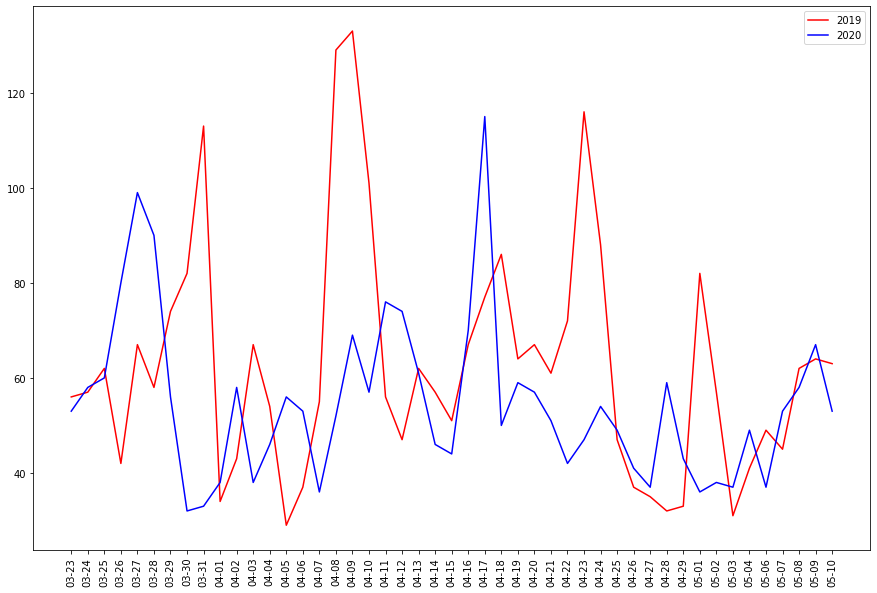

In [94]:
# Create a line chart that compares AQI for lockdown periods between 2019 and 2020
x_axis=new_london_df["new_date"]
y_axis=new_london_df["2019 AQI"]
x2=new_london_df["new_date"]
y2=new_london_df["2020 AQI"]

plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
london_2019, = plt.plot(x_axis,y_axis, color="red", label="2019")
london_2020, = plt.plot(x2,y2,  color="blue", label="2020")

# Create a legend for our chart
plt.legend(handles=[london_2019, london_2020], loc="best")
plt.show()

In [110]:
# Compute a mean of the pollutants during the same months in 2019 as lockdown period in 2020
london_2019_mean = london_2019_df.mean()
london_2019_mean[1:6]

pm10    30.794729
o3      32.537460
no2     31.718602
so2      8.489718
co      12.000133
dtype: float64

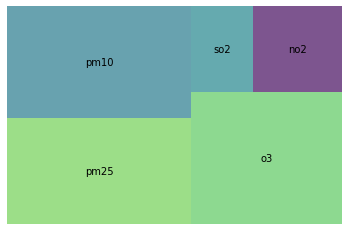

In [119]:
# Create a treemap for the pollutants for the lockdown period in 2019
squarify.plot(sizes=london_2019_mean[1:6], label=["pm25", "pm10", "o3", "so2", "no2", "co",], alpha=.7)
plt.axis('off')
plt.show()

In [114]:
# Compute a mean of the pollutants during the lockdown period
london_lockdown_mean = london_lockdown_df.mean()
london_lockdown_mean[1:6]

pm10    27.125000
o3      34.520833
no2     18.708333
so2      4.895833
co       3.250000
dtype: float64

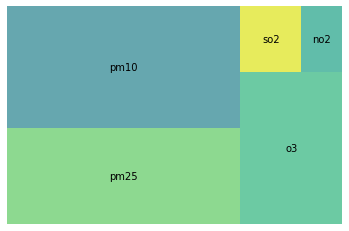

In [118]:
# Create a treemap for the pollutants for the lockdown period in 2020
squarify.plot(sizes=london_lockdown_mean[1:6], label=["pm25", "pm10", "o3", "so2", "no2", "co",], alpha=.7)
plt.axis('off')
plt.show()